# Data Cleaning & Exploratory Data Analysis (EDA) - Psychometric and Demographic

This notebook aims to perform Data Cleaning and EDA on the Flipkart psychometric and demographic data.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Load dataset
psycometric_data = pd.read_csv('data/Psychometric and Demographic Data.csv', index_col=0)
psycometric_data.reset_index(drop=True, inplace=True) # Reset index due to dirty data

In [10]:
psycometric_data.shape

(304, 59)

In [11]:
psycometric_data.head()

,Name,Gender,Current Job Title,Marital Status,Do you have to care for anyone with chronic illness?,Income (per month),Preferred Mode of Payment,Do you practise meditation? Yes/No,If yes,Do you do any form of exercise?,...,I believe success in life does not mean becoming rich,I segregate waste before its disposal,I try to conserve water,I try to educate people I know about climate change,I sign petitions related to environmental issues,I try to conserve electricity,I walk/cycle/use public transport to save fuel,Age,has_child,Lives_in_city_tier
0,G6M1R6,Male,Service Engineer,Not Married,No,Prefer Not to Say,UPI,No,No,No,...,5,4,5,4,3,4,4,24,No,Tier_2
1,G6M1R1,Male,Production Engineer,Not Married,No,"Rs. 25,000 – 50,000",UPI,No,I have never tried.,Yes,...,6,2,6,6,5,2,3,25,No,Tier_2
2,G6M1R8,Female,Lecturer,Married,No,"Rs. 50,000 – 75,000",UPI,No,I have never tried.,Yes,...,7,4,7,7,7,6,6,30,No,Tier 3
3,G6M1R5,Male,Student,Not Married,No,Prefer Not to Say,Debit Card,No,No,Yes,...,6,2,6,6,4,6,6,24,No,Tier_2
4,G6M1R9,Male,Student,Not Married,No,Prefer Not to Say,Debit Card,No,I have never tried.,No,...,7,7,7,7,7,7,7,23,No,Tier_2


In [12]:
psycometric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 59 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Name                                                                                 304 non-null    object 
 1   Gender                                                                               304 non-null    object 
 2   Current Job Title                                                                    304 non-null    object 
 3   Marital Status                                                                       304 non-null    object 
 4   Do you have to care for anyone with chronic illness?                                 304 non-null    object 
 5   Income (per month)                                                                   304 non

# Data Cleaning

## Rename ambiguous column names

In [13]:
# Rename column names
psycometric_data = psycometric_data.rename(columns={"If yes": "If you do meditate, how often do you practise meditation?", 
                                                "If yes.1": "If you exercise, how often do you exercise?", 
                                                " How often do you volunteer for social-service activities?": "How often do you volunteer for social-service activities?", 
                                                "Do you practise meditation? Yes/No" : "Do you practise meditation?",
                                                "The Conditions in my life are excellent.": "The conditions in my life are excellent",
                                                "Hobbies_Count": "Hobbies Count",
                                                "has_child": "Has Child",
                                                "Lives_in_city_tier": "Lives in City Tier"})

## Check for null values

In [14]:
# Check for null values
psycometric_data.isna().sum()

Name                                                                                   0
Gender                                                                                 0
Current Job Title                                                                      0
Marital Status                                                                         0
Do you have to care for anyone with chronic illness?                                   0
Income (per month)                                                                     0
Preferred Mode of Payment                                                              0
Do you practise meditation?                                                            0
If you do meditate, how often do you practise meditation?                              0
Do you do any form of exercise?                                                        0
If you exercise, how often do you exercise?                                            0
How often do you volu

### Replace NA hobbies count with mode

In [15]:
psycometric_data['Hobbies Count'].value_counts()

1.0    153
2.0     81
3.0     41
4.0     18
5.0      6
0.0      2
6.0      2
Name: Hobbies Count, dtype: int64

In [19]:
null_hobbies_psycometric_data = psycometric_data[psycometric_data['Hobbies Count'].isna()]
null_hobbies_psycometric_data.head()

,Name,Gender,Current Job Title,Marital Status,Do you have to care for anyone with chronic illness?,Income (per month),Preferred Mode of Payment,Do you practise meditation?,"If you do meditate, how often do you practise meditation?",Do you do any form of exercise?,...,I believe success in life does not mean becoming rich,I segregate waste before its disposal,I try to conserve water,I try to educate people I know about climate change,I sign petitions related to environmental issues,I try to conserve electricity,I walk/cycle/use public transport to save fuel,Age,Has Child,Lives in City Tier
39,G6M3R16,Male,Student,Not Married,No,Prefer Not to Say,UPI,Yes,sometimes but not consistent,Yes,...,7,5,6,7,5,7,7,21,No,Tier 3


In [20]:
# Check hobbies frequency - since labelled as always, replacement is needed
null_hobbies_psycometric_data['How often do you pursue your hobbies?']

39    Always
Name: How often do you pursue your hobbies?, dtype: object

In [21]:
zero_hobbies_psycometric_data = psycometric_data[psycometric_data['Hobbies Count'] == 0]
zero_hobbies_psycometric_data.head()

,Name,Gender,Current Job Title,Marital Status,Do you have to care for anyone with chronic illness?,Income (per month),Preferred Mode of Payment,Do you practise meditation?,"If you do meditate, how often do you practise meditation?",Do you do any form of exercise?,...,I believe success in life does not mean becoming rich,I segregate waste before its disposal,I try to conserve water,I try to educate people I know about climate change,I sign petitions related to environmental issues,I try to conserve electricity,I walk/cycle/use public transport to save fuel,Age,Has Child,Lives in City Tier
102,G3M5R6,Male,Engineer,Not Married,No,"Rs. 1,00, 000 – 1,50,000",Credit Card,Yes,everyday,Yes,...,7,7,7,1,1,5,7,27,No,Tier 3
150,G5M1R3,Male,GM,Married,No,"Rs. 1,50, 000 – 2,00, 000",Credit Card,Yes,Everyday,Yes,...,5,6,4,5,7,4,5,53,Yes,Tier 3


In [22]:
# Check hobbies frequency - since labelled as never, no replacement of mode is needed
zero_hobbies_psycometric_data['How often do you pursue your hobbies?']

102    Never
150    Never
Name: How often do you pursue your hobbies?, dtype: object

In [23]:
# Get mode
psycometric_data['Hobbies Count'].mode().tolist()

[1.0]

In [24]:
# Impute NA value in Hobbies Count as mode of hobbies like in the original code
psycometric_data.loc[39, 'Hobbies Count'] = psycometric_data['Hobbies Count'].mode()[0]

## Standardise float to int scale

The things I own say a lot about how well I’m doing in life

In [25]:
# Check 'The things I own say a lot about how well I’m doing in life' values - float64 instead of int64 unlike the other survey columns
psycometric_data['The things I own say a lot about how well I’m doing in life'].value_counts()

4.0    60
5.0    57
6.0    55
7.0    35
3.0    34
1.0    27
2.0    26
4.5    10
Name: The things I own say a lot about how well I’m doing in life, dtype: int64

In [26]:
# Convert 'The things I own say a lot about how well I’m doing in life' from float to int
# 4.5 values should not exist given that the survey only allows int values
psycometric_data['The things I own say a lot about how well I’m doing in life'] = psycometric_data['The things I own say a lot about how well I’m doing in life'].astype(int)

Hobbies Count

In [27]:
psycometric_data['Hobbies Count'].value_counts()

1.0    154
2.0     81
3.0     41
4.0     18
5.0      6
0.0      2
6.0      2
Name: Hobbies Count, dtype: int64

In [28]:
# Convert 'Hobbies Count' column to int
psycometric_data['Hobbies Count'] = psycometric_data['Hobbies Count'].astype(int)

## Standardise values

Lives in City Tier

In [29]:
psycometric_data["Lives in City Tier"].value_counts()

Tier 3    130
Tier_2    114
Tier_1     60
Name: Lives in City Tier, dtype: int64

In [30]:
# Standardise City Tier values
psycometric_data["Lives in City Tier"].replace({"Tier_1": "Tier 1", "Tier_2": "Tier 2"}, inplace=True)

In [31]:
psycometric_data["Lives in City Tier"].value_counts()

Tier 3    130
Tier 2    114
Tier 1     60
Name: Lives in City Tier, dtype: int64

How often do you pursue your hobbies?

In [32]:
psycometric_data['How often do you pursue your hobbies?'].value_counts()

sometimes     116
very often     96
Always         71
Rarely         13
Never           3
Very often      2
Daily           2
Sometimes       1
Name: How often do you pursue your hobbies?, dtype: int64

In [33]:
# Standardise Hobbies Frequency Values
psycometric_data['How often do you pursue your hobbies?'].replace({"sometimes": "Sometimes", "very often": "Very often"}, inplace=True)

In [34]:
psycometric_data['How often do you pursue your hobbies?'].value_counts()

Sometimes     117
Very often     98
Always         71
Rarely         13
Never           3
Daily           2
Name: How often do you pursue your hobbies?, dtype: int64

Current Job Title

In [35]:
print(list(psycometric_data['Current Job Title'].unique()))

['Service Engineer', 'Production Engineer', 'Lecturer', 'Student', 'Recruiter', 'Software Engineer', 'Senior Data Scientist', 'Functional expert', 'Gis Engineer', 'Shift manager', 'Assistant Manager', 'R & D manager', 'BIS Scientist', 'Accountant', 'Intern', 'Developer', 'Student ', 'Engineer', 'Research Scholar', 'Self employed', 'Working', 'Category Manager', 'Unemployed', 'Business', 'Pharmacist', 'Lawyer', 'Cabin Crew', 'Banking', 'Research scholar', 'Domain Expert, Ergonomics', 'RESEARCH SCHOLAR', 'Junior Research Fellow', 'Housewife', 'PhD Student', 'Design engineer', 'Consultant', 'Retired', 'Doctor', 'Automobile Engineer', 'Scientist', 'Manager', 'Jobless', 'Team Leader', 'Senior Engineer', 'Officer', 'Senior executive', 'Sales', 'Graphic Designer', 'Analyst ', 'Freelancer', 'Data Analyst', 'Private Teacher', 'Process associate ', 'City lunch manager', 'Software Engineer ', 'Associate Manager', 'GET', 'Production engineer', 'SWO-A', 'Get', 'GM', 'Graduate Engineer Trainee', 'Cl

In [36]:
# Standardise Job Titles
# Remove leading and trailing white spaces, capitalise first letter of each word
psycometric_data['Current Job Title'] = psycometric_data['Current Job Title'].apply(lambda x: x.strip().title()) 

psycometric_data['Current Job Title'].replace({"Jobless": "Unemployed"}, inplace=True)

In [37]:
print(list(psycometric_data['Current Job Title'].unique()))

['Service Engineer', 'Production Engineer', 'Lecturer', 'Student', 'Recruiter', 'Software Engineer', 'Senior Data Scientist', 'Functional Expert', 'Gis Engineer', 'Shift Manager', 'Assistant Manager', 'R & D Manager', 'Bis Scientist', 'Accountant', 'Intern', 'Developer', 'Engineer', 'Research Scholar', 'Self Employed', 'Working', 'Category Manager', 'Unemployed', 'Business', 'Pharmacist', 'Lawyer', 'Cabin Crew', 'Banking', 'Domain Expert, Ergonomics', 'Junior Research Fellow', 'Housewife', 'Phd Student', 'Design Engineer', 'Consultant', 'Retired', 'Doctor', 'Automobile Engineer', 'Scientist', 'Manager', 'Team Leader', 'Senior Engineer', 'Officer', 'Senior Executive', 'Sales', 'Graphic Designer', 'Analyst', 'Freelancer', 'Data Analyst', 'Private Teacher', 'Process Associate', 'City Lunch Manager', 'Associate Manager', 'Get', 'Swo-A', 'Gm', 'Graduate Engineer Trainee', 'Client Relation', 'Technical Officer', 'Team Lead', 'Senior Operations Officer', 'Travel Agent', 'Homemaker', 'Data Sci

Income (per month)

In [38]:
psycometric_data['Income (per month)'].value_counts()

Prefer Not to Say            139
Rs. 25,000 – 50,000           47
Rs. 10,000 – 25,000           43
Rs. 50,000 – 75,000           34
Rs. 75,000 – 1,00,000         13
Rs. 2,00,000 and above         8
Rs. 1,00, 000 – 1,50,000       8
Prefer not to say              7
Rs. 1,50, 000 – 2,00, 000      5
Name: Income (per month), dtype: int64

In [39]:
# Standardise Income
psycometric_data['Income (per month)'].replace({"Prefer not to say": "Prefer Not to Say", 
                                              "Rs. 75,000 – 1,00,000" : "Rs. 75,000 – 100,000", 
                                              "Rs. 1,00, 000 – 1,50,000" : "Rs. 100,000 – 150,000", 
                                              "Rs. 2,00,000 and above" : "Rs. 200,000 and above", 
                                              "Rs. 1,50, 000 – 2,00, 000" : "Rs. 150,000 – 200,000"}, inplace=True)

In [40]:
psycometric_data['Income (per month)'].value_counts()

Prefer Not to Say        146
Rs. 25,000 – 50,000       47
Rs. 10,000 – 25,000       43
Rs. 50,000 – 75,000       34
Rs. 75,000 – 100,000      13
Rs. 100,000 – 150,000      8
Rs. 200,000 and above      8
Rs. 150,000 – 200,000      5
Name: Income (per month), dtype: int64

Preferred Mode of Payment

In [41]:
psycometric_data['Preferred Mode of Payment'].value_counts()

UPI                 198
Cash on Delivery     39
Debit Card           22
Credit Card          22
Net Banking           8
Online Wallets        7
Any Other             5
Cash On Delivery      3
Name: Preferred Mode of Payment, dtype: int64

In [42]:
# Standardise Preferred Mode of Payment
psycometric_data['Preferred Mode of Payment'].replace({"Cash on Delivery": "Cash On Delivery"}, inplace=True)

In [43]:
psycometric_data['Preferred Mode of Payment'].value_counts()

UPI                 198
Cash On Delivery     42
Debit Card           22
Credit Card          22
Net Banking           8
Online Wallets        7
Any Other             5
Name: Preferred Mode of Payment, dtype: int64

If you do meditate, how often do you practise mediation?

In [44]:
psycometric_data['If you do meditate, how often do you practise meditation?'].value_counts()

I have never tried.             87
sometimes but not consistent    80
No                              58
everyday                        34
once or twice a week            33
Everyday                         8
1/2 times a week                 4
Name: If you do meditate, how often do you practise meditation?, dtype: int64

In [45]:
# Standardise Meditation Frequency
psycometric_data['If you do meditate, how often do you practise meditation?'].replace({"I have never tried.": "No", 
                                                                                    "everyday": "Everyday", 
                                                                                    "1/2 times a week": "Once or Twice a week", 
                                                                                    "once or twice a week": "Once or Twice a week", 
                                                                                    "sometimes but not consistent": "Sometimes but Not Consistent"}, inplace=True)

In [46]:
psycometric_data['If you do meditate, how often do you practise meditation?'].value_counts()

No                              145
Sometimes but Not Consistent     80
Everyday                         42
Once or Twice a week             37
Name: If you do meditate, how often do you practise meditation?, dtype: int64

Do you do any form of exercise?

In [47]:
psycometric_data['Do you do any form of exercise?'].value_counts()

Yes                             220
No                               83
sometimes but not consistent      1
Name: Do you do any form of exercise?, dtype: int64

In [48]:
# Standardise Exercise Frequency
psycometric_data['Do you do any form of exercise?'].replace({"sometimes but not consistent": "Yes"}, inplace=True)

In [49]:
psycometric_data['Do you do any form of exercise?'].value_counts()

Yes    221
No      83
Name: Do you do any form of exercise?, dtype: int64

If you exercise, how often do you exercise?

In [50]:
psycometric_data['If you exercise, how often do you exercise?'].value_counts()

sometimes but not consistent    107
everyday                         81
once or twice a week             57
No                               46
Everyday                          9
1/2 times a week                  3
Very Often                        1
Name: If you exercise, how often do you exercise?, dtype: int64

In [51]:
# I interpret "1/2 times a week" as equivalent to once or twice a week, Everyday = everyday
psycometric_data['If you exercise, how often do you exercise?'].replace({"everyday" : "Everyday",
                                                                       "1/2 times a week" : "Once or Twice a week",
                                                                       "once or twice a week" : "Once or Twice a week", 
                                                                       "sometimes but not consistent": "Sometimes but Not Consistent", 
                                                                       "Very Often" : "Once or Twice a week"}, inplace=True)

In [52]:
psycometric_data['If you exercise, how often do you exercise?'].value_counts()

Sometimes but Not Consistent    107
Everyday                         90
Once or Twice a week             61
No                               46
Name: If you exercise, how often do you exercise?, dtype: int64

How often do you pursue your hobbies?

In [53]:
psycometric_data['How often do you pursue your hobbies?'].value_counts()

Sometimes     117
Very often     98
Always         71
Rarely         13
Never           3
Daily           2
Name: How often do you pursue your hobbies?, dtype: int64

In [54]:
psycometric_data['How often do you pursue your hobbies?'].replace({"sometimes": "Sometimes",
                                                                 "very often": "Very Often", 
                                                                 "Very often": "Very Often", 
                                                                 "Daily": "Very Often"}, inplace=True)

In [55]:
psycometric_data['How often do you pursue your hobbies?'].value_counts()

Sometimes     117
Very Often    100
Always         71
Rarely         13
Never           3
Name: How often do you pursue your hobbies?, dtype: int64

Do you have to care for anyone with chronic illness?

In [56]:
psycometric_data['Do you have to care for anyone with chronic illness?'].value_counts()

No     261
Yes     41
NO       1
no       1
Name: Do you have to care for anyone with chronic illness?, dtype: int64

In [57]:
psycometric_data['Do you have to care for anyone with chronic illness?'].replace({"no": "No",
                                                                                "NO": "No"}, inplace=True)

In [58]:
psycometric_data['Do you have to care for anyone with chronic illness?'].value_counts()

No     263
Yes     41
Name: Do you have to care for anyone with chronic illness?, dtype: int64

## Change Age 0 values to Mean

In [59]:
psycometric_data[psycometric_data['Age'] == 0]

,Name,Gender,Current Job Title,Marital Status,Do you have to care for anyone with chronic illness?,Income (per month),Preferred Mode of Payment,Do you practise meditation?,"If you do meditate, how often do you practise meditation?",Do you do any form of exercise?,...,I believe success in life does not mean becoming rich,I segregate waste before its disposal,I try to conserve water,I try to educate people I know about climate change,I sign petitions related to environmental issues,I try to conserve electricity,I walk/cycle/use public transport to save fuel,Age,Has Child,Lives in City Tier
50,G5M3R6,Male,Category Manager,Not Married,No,"Rs. 75,000 – 100,000",UPI,No,No,No,...,4,4,4,4,4,4,4,0,No,Tier 1
173,G6M4R8,Male,Student,Not Married,No,"Rs. 10,000 – 25,000",UPI,Yes,Sometimes but Not Consistent,Yes,...,4,4,7,7,4,7,4,0,No,Tier 3


In [60]:
# Replace 0 values with mean
mean_age = round(np.mean(psycometric_data['Age']))
psycometric_data['Age'] = np.where(psycometric_data['Age'] == 0, mean_age, psycometric_data['Age'])

## Check for duplicated rows

In [61]:
psycometric_data.duplicated().sum()

0

### Remove Duplicated Rows with Same Name

In [62]:
psycometric_data['Name'].duplicated().sum()

1

In [63]:
psycometric_data[psycometric_data['Name'].duplicated(keep=False)]

,Name,Gender,Current Job Title,Marital Status,Do you have to care for anyone with chronic illness?,Income (per month),Preferred Mode of Payment,Do you practise meditation?,"If you do meditate, how often do you practise meditation?",Do you do any form of exercise?,...,I believe success in life does not mean becoming rich,I segregate waste before its disposal,I try to conserve water,I try to educate people I know about climate change,I sign petitions related to environmental issues,I try to conserve electricity,I walk/cycle/use public transport to save fuel,Age,Has Child,Lives in City Tier
76,G3M2R2,Male,Student,Not Married,Yes,Prefer Not to Say,UPI,No,Sometimes but Not Consistent,Yes,...,2,3,5,1,6,4,6,19,No,Tier 2
77,G3M2R2,Male,Student,Not Married,No,Prefer Not to Say,Cash On Delivery,No,No,No,...,6,4,6,5,1,5,6,24,No,Tier 2


In [64]:
# Remove the second duplicated name row
psycometric_data.drop_duplicates(subset=['Name'], inplace=True)

## Export

In [65]:
psycometric_data.shape

(303, 59)

In [66]:
psycometric_data.head()

,Name,Gender,Current Job Title,Marital Status,Do you have to care for anyone with chronic illness?,Income (per month),Preferred Mode of Payment,Do you practise meditation?,"If you do meditate, how often do you practise meditation?",Do you do any form of exercise?,...,I believe success in life does not mean becoming rich,I segregate waste before its disposal,I try to conserve water,I try to educate people I know about climate change,I sign petitions related to environmental issues,I try to conserve electricity,I walk/cycle/use public transport to save fuel,Age,Has Child,Lives in City Tier
0,G6M1R6,Male,Service Engineer,Not Married,No,Prefer Not to Say,UPI,No,No,No,...,5,4,5,4,3,4,4,24,No,Tier 2
1,G6M1R1,Male,Production Engineer,Not Married,No,"Rs. 25,000 – 50,000",UPI,No,No,Yes,...,6,2,6,6,5,2,3,25,No,Tier 2
2,G6M1R8,Female,Lecturer,Married,No,"Rs. 50,000 – 75,000",UPI,No,No,Yes,...,7,4,7,7,7,6,6,30,No,Tier 3
3,G6M1R5,Male,Student,Not Married,No,Prefer Not to Say,Debit Card,No,No,Yes,...,6,2,6,6,4,6,6,24,No,Tier 2
4,G6M1R9,Male,Student,Not Married,No,Prefer Not to Say,Debit Card,No,No,No,...,7,7,7,7,7,7,7,23,No,Tier 2


In [68]:
# Save to CSV
# Cleaned demographic + cleaned psychometric columns
psycometric_data.to_csv('data/psychometric_demo_clean.csv', index=False)

# Exploratory Data Analysis (EDA)

In [2]:
# Load clean CSV file
psycometric_data = pd.read_csv('data/psychometric_demo_clean.csv')

## Numerical Variables

In [3]:
psycometric_data.describe()

,Hobbies Count,"In most ways, my life is close to my ideal",The conditions in my life are excellent,"So far, I have got the important things I want in my life","If I could live my life over, I would change almost nothing",Many people have directly or indirectly contributed to my progress in life,I feel good when I co-operate with others,"When making a decision, I take other people's needs and feelings into account.","It is my duty to take care of my family, even when I have to sacrifice what I want.",Honesty is important to achieve success,...,My happiness does not depend on things I own,There is a higher purpose to life than comfort and luxury,I believe success in life does not mean becoming rich,I segregate waste before its disposal,I try to conserve water,I try to educate people I know about climate change,I sign petitions related to environmental issues,I try to conserve electricity,I walk/cycle/use public transport to save fuel,Age
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.00000,303.000000,303.000000,303.000000,303.000000
mean,1.821782,5.046205,5.003300,4.940594,4.211221,5.607261,6.016502,5.617162,5.957096,5.825083,...,4.983498,5.673267,5.557756,5.191419,5.924092,5.39934,4.762376,5.864686,5.000000,26.323432
std,1.077119,1.267726,1.318484,1.486062,1.834621,1.335040,0.991550,1.222838,1.134122,1.371094,...,1.510359,1.318053,1.474664,1.634578,1.172610,1.53834,1.879562,1.252087,1.705076,7.343579
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,15.000000
25%,1.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,5.000000,5.000000,4.000000,5.000000,4.00000,4.000000,5.000000,4.000000,23.000000
50%,1.000000,5.000000,5.000000,5.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,6.000000,6.000000,5.000000,6.000000,6.00000,5.000000,6.000000,5.000000,24.000000
75%,2.000000,6.000000,6.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,6.000000,7.000000,7.000000,7.000000,7.000000,7.00000,6.000000,7.000000,7.000000,26.000000
max,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,65.000000


### Age

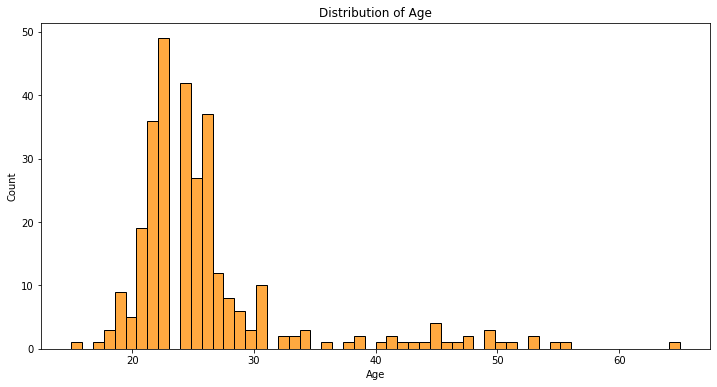

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(psycometric_data['Age'], color='darkorange')
plt.title("Distribution of Age")
plt.show()

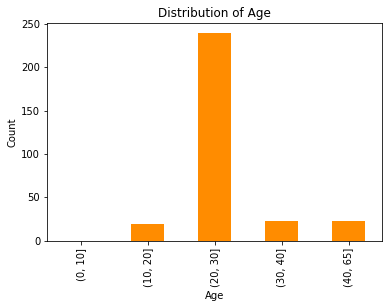

In [6]:
bins = [0, 10, 20, 30, 40, max(psycometric_data['Age'])]
age_ct = psycometric_data.groupby(pd.cut(psycometric_data['Age'], bins=bins)).Age.count()
age_ct.plot(kind='bar', color='darkorange')
plt.title("Distribution of Age")
plt.ylabel("Count")
plt.show()

## Categorical Variables

### Gender

In [16]:
psycometric_data['Gender'].value_counts()

Male      226
Female     77
Name: Gender, dtype: int64

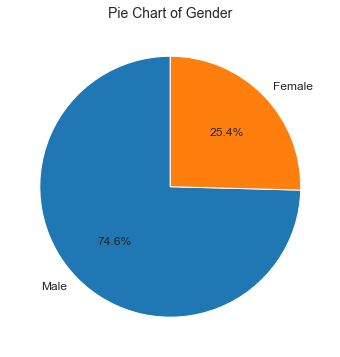

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
labels=['Male','Female']
plt.pie(psycometric_data['Gender'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title("Pie Chart of Gender", fontsize=14)
plt.show()

### Income (per month)

In [8]:
psycometric_data['Income (per month)'].value_counts()

Prefer Not to Say        145
Rs. 25,000 – 50,000       47
Rs. 10,000 – 25,000       43
Rs. 50,000 – 75,000       34
Rs. 75,000 – 100,000      13
Rs. 100,000 – 150,000      8
Rs. 200,000 and above      8
Rs. 150,000 – 200,000      5
Name: Income (per month), dtype: int64

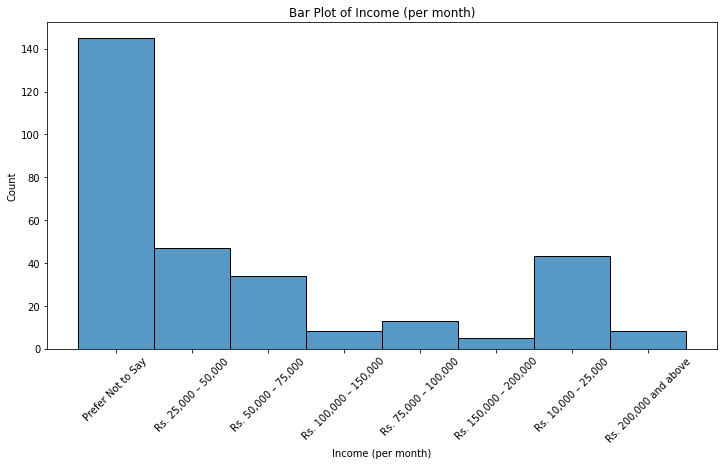

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(psycometric_data['Income (per month)'])
plt.title("Bar Plot of Income (per month)")
plt.xticks(rotation=45)
plt.show()

### Preferred Mode of Payment

In [10]:
psycometric_data['Preferred Mode of Payment'].value_counts()

UPI                 198
Cash On Delivery     41
Credit Card          22
Debit Card           22
Net Banking           8
Online Wallets        7
Any Other             5
Name: Preferred Mode of Payment, dtype: int64

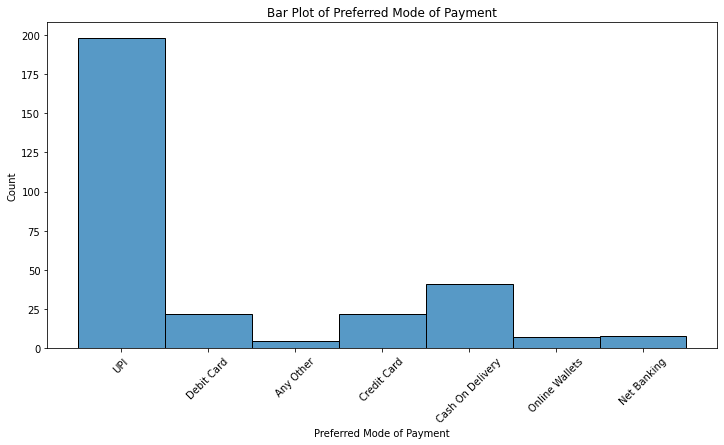

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(psycometric_data['Preferred Mode of Payment'])
plt.title("Bar Plot of Preferred Mode of Payment")
plt.xticks(rotation=45)
plt.show()

### Lives in City Tier

In [12]:
psycometric_data['Lives in City Tier'].value_counts()

Tier 3    130
Tier 2    113
Tier 1     60
Name: Lives in City Tier, dtype: int64

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


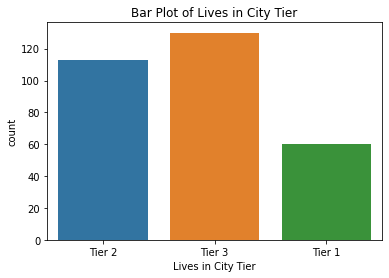

In [13]:
sns.countplot(psycometric_data['Lives in City Tier'])
plt.title("Bar Plot of Lives in City Tier")
plt.show()